In [1]:
import os
from glob import glob
import numpy as np
from dataset import parse_data 

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from utils import *

In [2]:
# Function to shuffle the data
def shuffle(X, Y):
    Y = Y.reshape(-1, 1)
    data = np.concatenate((X, Y), axis=1)
    np.random.shuffle(data)
    Y = data[:, -1].astype(np.uint8)
    X = data[:, :-1]
    return X, Y

In [3]:
# Function to generate the required plots
def plot_data(X, Y, title=''):
    fig, ax = plt.subplots()
    scatter = ax.scatter(X[:, 0], X[:,1], c=Y)
    ax.set_title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    legend = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend)
    plt.show()

In [4]:
# Implementation of a Perceptron Classifier
import sys
class MultiPerceptron:
    def __init__(self):
        self.w = None # initialize during training
        self.b = None

    def predict(self, X):
        y_list = []
        for x in X:
            max_out = -sys.maxsize
            for c in self.classes:
                out = np.dot(x, self.w[c]) + self.b[c]
                out = np.where(out>=0, 1, 0)
                if out > max_out:
                    max_out = out
                    y = c
            y_list.append(y)

        return np.array(y_list)

        
    def fit(self, X, Y, epochs=1000, lr=0.001):
        n_examples, n_features = X.shape
        self.classes = np.unique(Y)

        self.w = {c : np.zeros(n_features) for c in self.classes}
        self.b = {c : 0 for c in self.classes}

        for epoch in range(epochs):
            for i, x in enumerate(X):
                for c in self.classes:
                    out = np.dot(x, self.w[c]) + self.b[c]
                    out = np.where(out>=0, 1, 0)
                    if c == Y[i]:
                        update = lr * (1 - out)
                    else:
                        update = lr * (0 - out)
                    self.w[c] += update * x 
                    self.b[c] += update

# Linearly Separable Data

In [51]:
# Reading the data
root_dir = os.path.join('dataset', 'linearlySeparable')
X_train, Y_train = parse_data(root_dir, 'train')
X_train, Y_train = shuffle(X_train, Y_train)
Y_train = Y_train - 1 # Start class labels from 0
X_test, Y_test = parse_data(root_dir, 'test')
Y_test = Y_test - 1

In [52]:
# Using the perceptron for learning parameters
model = MultiPerceptron()
model.fit(X_train, Y_train, epochs=1000, lr=0.001)

In [53]:
# Make predictions using the classifier
Y_test_pred = model.predict(X_test)

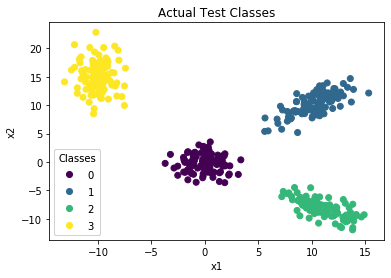

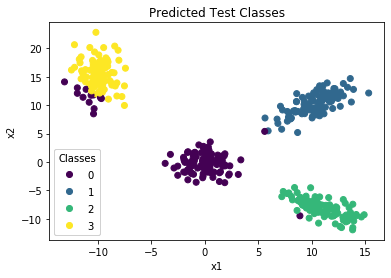

In [54]:
# Visualizaing the actual and predicted classes
plot_data(X_test, Y_test, 'Actual Test Classes')
plot_data(X_test, Y_test_pred, 'Predicted Test Classes')

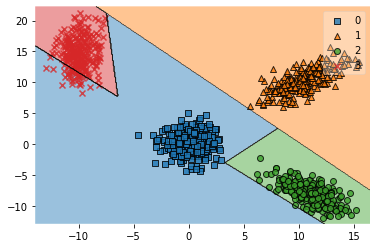

In [55]:
# Decision Region with Training Data
plot_decision_regions(X_train, Y_train, clf=model)
plt.show()

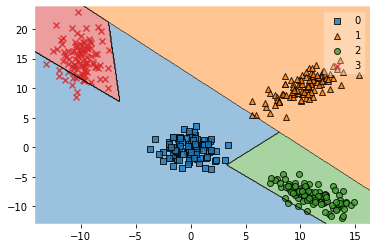

In [56]:
# Decision Region with Test Data
plot_decision_regions(X_test, Y_test, clf=model)
plt.show()

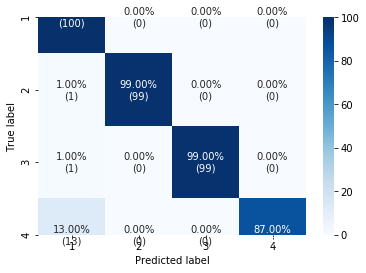

Mean Accuracy: 0.96
Mean Precision: 0.97
Mean Recall: 0.96
Mean F-measure: 0.96

Recall for class 1: 1.00
Recall for class 2: 0.99
Recall for class 3: 0.99
Recall for class 4: 0.87

F-measure for class 1: 0.93
F-measure for class 2: 0.99
F-measure for class 3: 0.99
F-measure for class 4: 0.93


In [57]:
# Performance Evaluation Metrics
confusion_matrix(Y_test, Y_test_pred)
metrics_summary(Y_test, Y_test_pred)

# Overlapping

In [12]:
# Reading the data
root_dir = os.path.join('dataset', 'overlapping')
X_train, Y_train = parse_data(root_dir, 'train')
X_train, Y_train = shuffle(X_train, Y_train)
Y_train = Y_train - 1 # Start class labels from 0
X_test, Y_test = parse_data(root_dir, 'test')
Y_test = Y_test - 1

In [13]:
# Using the perceptron for learning parameters
model = MultiPerceptron()
model.fit(X_train, Y_train, epochs=100, lr=0.001)

In [14]:
# Make predictions using the classifier
Y_test_pred = model.predict(X_test)

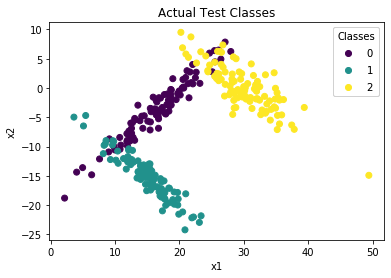

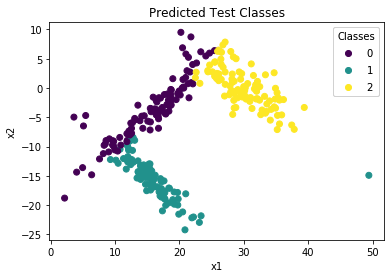

In [15]:
# Visualizaing the actual and predicted classes
plot_data(X_test, Y_test, 'Actual Test Classes')
plot_data(X_test, Y_test_pred, 'Predicted Test Classes')

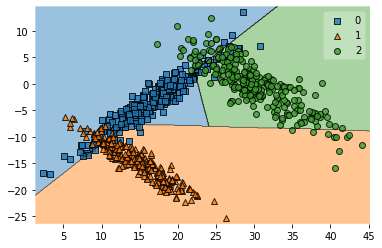

In [16]:
# Decision Region with Training Data
plot_decision_regions(X_train, Y_train, clf=model)
plt.show()

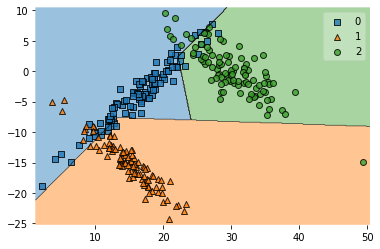

In [17]:
# Decision Region with Test Data
plot_decision_regions(X_test, Y_test, clf=model)
plt.show()

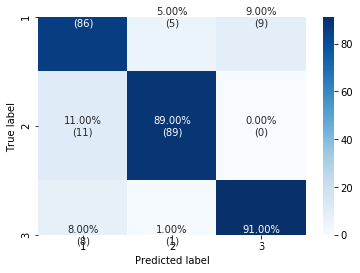

Mean Accuracy: 0.89
Mean Precision: 0.89
Mean Recall: 0.89
Mean F-measure: 0.89

Recall for class 1: 0.86
Recall for class 2: 0.89
Recall for class 3: 0.91

F-measure for class 1: 0.84
F-measure for class 2: 0.91
F-measure for class 3: 0.91


In [18]:
# Performance Evaluation Metrics
confusion_matrix(Y_test, Y_test_pred)
metrics_summary(Y_test, Y_test_pred)

# Non Linearly Separable

In [44]:
# Reading the data
root_dir = os.path.join('dataset', 'nonLinearlySeparable')
X_train, Y_train = parse_data(root_dir, 'train')
X_train, Y_train = shuffle(X_train, Y_train)
Y_train = Y_train - 1 # Start class labels from 0
X_test, Y_test = parse_data(root_dir, 'test')
Y_test = Y_test - 1

In [45]:
# Using the perceptron for learning parameters
model = MultiPerceptron()
model.fit(X_train, Y_train, epochs=100, lr=0.001)

In [46]:
# Make predictions using the classifier
Y_test_pred = model.predict(X_test)

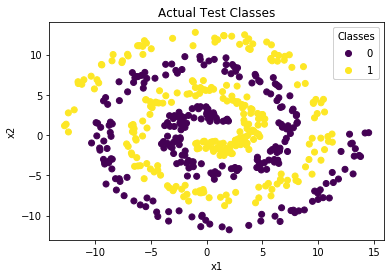

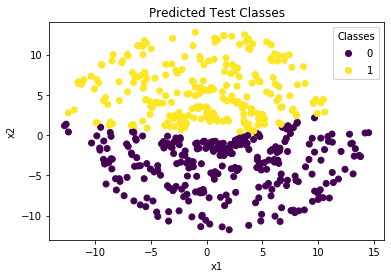

In [47]:
# Visualizaing the actual and predicted classes
plot_data(X_test, Y_test, 'Actual Test Classes')
plot_data(X_test, Y_test_pred, 'Predicted Test Classes')

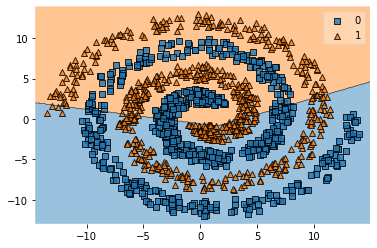

In [48]:
# Decision Region with Training Data
plot_decision_regions(X_train, Y_train, clf=model)
plt.show()

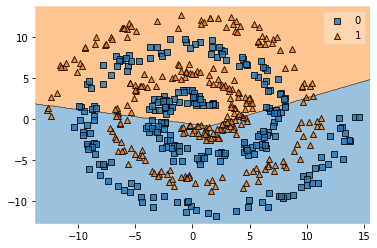

In [49]:
# Decision Region with Test Data
plot_decision_regions(X_test, Y_test, clf=model)
plt.show()

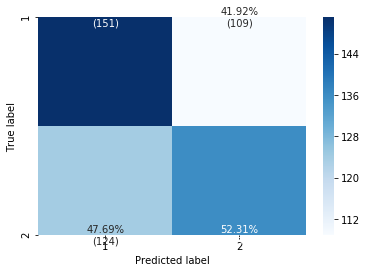

Mean Accuracy: 0.55
Mean Precision: 0.55
Mean Recall: 0.55
Mean F-measure: 0.55

Recall for class 1: 0.58
Recall for class 2: 0.52

F-measure for class 1: 0.56
F-measure for class 2: 0.54


In [50]:
# Performance Evaluation Metrics
confusion_matrix(Y_test, Y_test_pred)
metrics_summary(Y_test, Y_test_pred)